In [1]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt

In [2]:
df_ref = pd.read_csv('Output_SolarWind\\df_final_SI_combined_SolarWind.csv')
df_solar = df_ref.drop(columns=['geometry'])
df_solar = df_solar.loc[df_solar['from_pol_id_solar']>0]
df_wind = df_ref.drop(columns=['geometry'])
df_wind = df_wind.loc[df_wind['from_pol_id_wind']>0]

df_ref['geometry'] = df_ref['geometry'].apply(wkt.loads)
df_solar['geometry'] = df_solar['coord_solar'].apply(wkt.loads)
df_wind['geometry'] = df_wind['coord_wind'].apply(wkt.loads)

df_ref = gpd.GeoDataFrame(df_ref, crs='epsg:4326')
df_solar = gpd.GeoDataFrame(df_solar, crs='epsg:4326')
df_wind = gpd.GeoDataFrame(df_wind, crs='epsg:4326')


       pol_id                                           geometry      area  \
10390   10390  POLYGON ((99.45000 16.33333, 99.47222 16.33333...  3273.453   

       from_pol_id_wind                                   list_pol_id_wind  \
10390               553  [1361 1495 1637 1638 1656 1663 1713 2163 2302 ...   

        SI_Wind  area_wind                                         coord_wind  \
10390  1.999818  2611.7152  MULTIPOLYGON (((99.65000000000002 16.127777777...   

       from_pol_id_solar                                  list_pol_id_solar  \
10390                587  [ 3697  4147  4994  5092  5148  6649  6673  70...   

       SI_Solar  area_solar  \
10390  2.193715   2837.3862   

                                             coord_solar      ADM1_EN  \
10390  MULTIPOLYGON (((99.39722222222224 16.308333333...  Uthai Thani   

         ADM1_TH region  
10390  อุทัยธานี     R4  


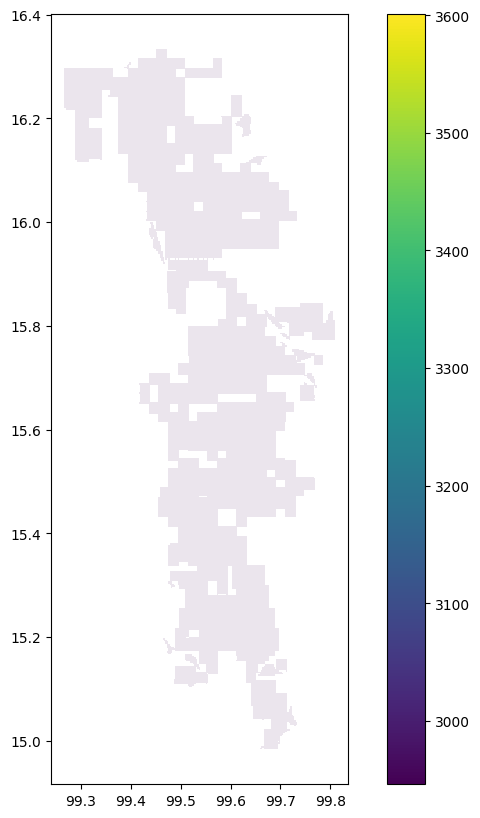

In [3]:
# thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
# thailandmap.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10,10))
# thailandmap.plot(ax = ax, color='none', edgecolor = 'white', zorder = 0)
# df_ref.plot(ax = ax,column = 'wind_SI', alpha = 0.1, zorder = 1)
df_ref.loc[df_ref['area'] == df_ref['area'].max()].plot(ax = ax,legend=True,zorder = 2,alpha = 0.1,column = 'area')
# df_solar.loc[df_solar['area'] == df_ref['area'].max()].plot(ax = ax,legend=True,zorder = 3,alpha = 1,column = 'area_solar')
# df_wind.loc[df_wind['area'] == df_ref['area'].max()].plot(ax = ax,legend=True,zorder = 3,alpha = 1,column = 'area_wind')

print(df_ref.loc[df_ref['area'] == df_ref['area'].max()])

